# Title

**Exercise: B.2 - Confidence Interval for Beta value**

# Description

The goal of this exercise is to create a plot like the one given below for $\beta_0$ and $\beta_1$ 

<img src="img/beta_confidence.png" style="width: 500px;">

# Instructions
- Follow the steps from the previous exercise to get the lists of beta values.
- Sort the list of beta values (from low to high).
- To compute the 95% confidence interval, find the 2.5 percentile and the 97.5 percentile using `np.percentile()`
- Use the helper code `plot_simulation()` to visualise the $\beta$ values along with its confidence interval


# Hints
<a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html" target="_blank">np.random.randint()</a> : Returns list of integers as per mentioned size 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" target="_blank">df.iloc[]</a> : Purely integer-location based indexing for selection by position

<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist()</a> : Plots a histogram

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html" target="_blank">plt.axvline()</a> : Adds a vertical line across the axes

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axhline.html" target="_blank">plt.axhline()</a> : Add a horizontal line across the axes

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html" target="_blank">plt.xlabel()</a> : Sets the label for the x-axis

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html" target="_blank">plt.ylabel()</a> : Sets  the label for the y-axis

<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html" target="_blank">plt.legend()</a> : Place a legend on the axes

<a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html#numpy.ndarray.sort" target="_blank">ndarray.sort()</a> :Returns the sorted ndarray.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.percentile.html" target="_blank">np.percentile(list, q)</a> : Returns the q-th percentile value based on the provided ascending list of values.

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_39729/2561010934.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading the standard Advertising dataset

In [3]:
# Read the 'Advertising_adj.csv' file
df = pd.read_csv('data/advertising_adj.csv')

In [4]:
# Use your bootstrap function from the previous exercise
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

In [5]:
# Like last time, create a list of beta values using 1000 bootstraps of your original data
beta0_list, beta1_list = [],[]

numberOfBootstraps = 100

for i in range(numberOfBootstraps):
    df_new = bootstrap(df)

    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

    beta1 = np.dot((df_new.tv-xmean) , (df_new.sales-ymean))/((df_new.tv-xmean)**2).sum()
    beta0 = ymean - beta1*xmean

    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [6]:
### edTest(test_sort) ###

# Sort the two lists of beta values  from lowest value to highest 
beta0_list.sort();
beta1_list.sort();

In [7]:
### edTest(test_beta) ###

# Now we find the confidence interval
# Find the 95% percent confidence interval using the percentile function
beta0_CI = (np.percentile(beta0_list, 2.5),np.percentile(beta0_list, 97.5))

beta1_CI = (np.percentile(beta1_list, 2.5),np.percentile(beta1_list, 97.5))

In [8]:
#Print the confidence interval of beta0 upto 3 decimal points
print(f'The beta0 confidence interval is ({beta0_CI[0]:.3f}, {beta0_CI[1]:.3f})')

The beta0 confidence interval is (135.830, 165.610)


In [9]:
#Print the confidence interval of beta1 upto 3 decimal points
print(f'The beta1 confidence interval is ({beta1_CI[0]:.3f}, {beta1_CI[1]:.3f})')

The beta1 confidence interval is (0.875, 1.100)


In [10]:
# Use this helper function to plot the histogram of beta values along with the 95% confidence interval
def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True)
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.title('Confidence Interval')
    plt.legend(frameon = False, loc = 'upper right')


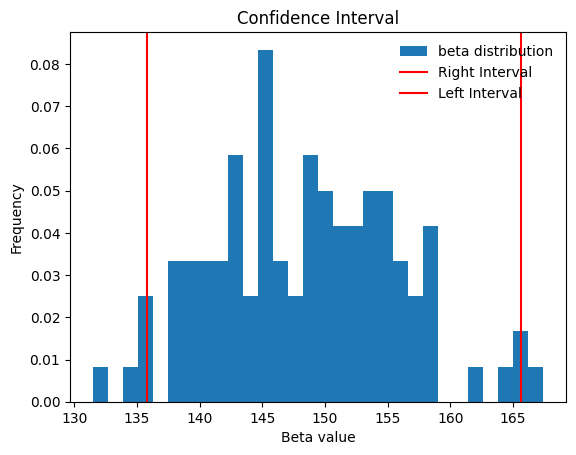

In [11]:
# Plot for beta 0
plot_simulation(beta0_list,beta0_CI)

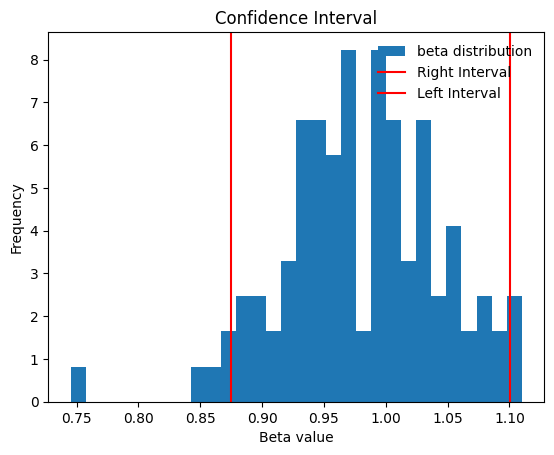

In [12]:
#Plot for beta 1
plot_simulation(beta1_list, beta1_CI)